In [4]:
import networkx as nx
from wisdom_of_crowds import Crowd
import random
import datetime
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
BG = nx.generators.random_graphs.fast_gnp_random_graph(5000, 0.0005, seed=1, directed=True)
for node in BG:
    coin = random.randint(0, 1)
    BG.nodes[node]['T'] = coin
print(BG)

start = datetime.datetime.now()
print(start)
hs = [] 
test = Crowd(BG)
for node in test.node_set:
    hs.append(test.h_measure(node))
print("total elapsed:",datetime.datetime.now()-start)

DiGraph with 5000 nodes and 12491 edges
2021-10-17 18:31:07.592871
total elapsed: 0:00:11.505595


[(2, 1292), (3, 1159), (1, 988), (4, 706), (0, 414), (5, 338), (6, 103)]


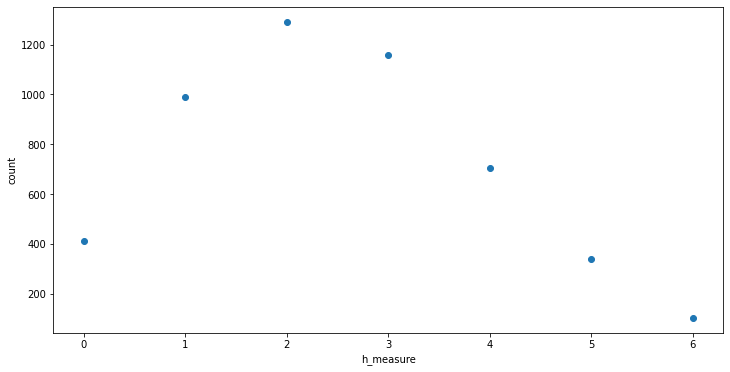

In [5]:
c = Counter(hs)
print(c.most_common())

plt.figure(figsize=(12,6))
xs = range(7)
ys = [c[x] for x in xs]
plt.scatter(xs,ys)
plt.xlabel('h_measure')
plt.ylabel('count')
plt.show()